In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')

from tqdm import tqdm

import torch

# Importing data to gdrive

## One time stuff

In [ ]:
# !git clone https://github.com/CDLQuantum2020Week1Team1/CohortProject_2020.git

Cloning into 'CohortProject_2020'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 727 (delta 0), reused 1 (delta 0), pack-reused 723
Receiving objects: 100% (727/727), 19.37 MiB | 7.10 MiB/s, done.
Resolving deltas: 100% (393/393), done.


In [ ]:
# !cp -r '/content/CohortProject_2020'  '/content/drive/My Drive/CDL'

## Loading dir

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
base_dir = '/content/drive/My Drive/CDL/CohortProject_2020/Project_1_RBM_and_Tomography'

In [3]:
%cd /content/drive/My Drive/CDL/CohortProject_2020/Project_1_RBM_and_Tomography
!pwd

/content/drive/My Drive/CDL/CohortProject_2020/Project_1_RBM_and_Tomography
/content/drive/My Drive/CDL/CohortProject_2020/Project_1_RBM_and_Tomography


# Task #2

A template code for training an RBM on Rydberg atom data (the full dataset) is provided below. For the first part of this task (determining the minimum number of hidden units), start with 20 hidden units. 

Imports and loadining in data:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from RBM_helper import RBM

import Rydberg_energy_calculator

training_data = torch.from_numpy(np.loadtxt("Rydberg_data.txt"))

In [3]:
training_data.size()

torch.Size([20000, 100])

Define the RBM:

In [4]:
n_vis = training_data.shape[1]
n_hin = 1

rbm = RBM(n_vis, n_hin)

In [5]:
epochs = 100
num_samples = 200

exact_energy = -4.1203519096
print("Exact energy: ",exact_energy)

Exact energy:  -4.1203519096


Train the RBM:

In [ ]:
epochs = 100
num_samples = 200

exact_energy = -4.1203519096
print("Exact energy: ",exact_energy)

for e in range(1, epochs+1):
    # do one epoch of training
    rbm.train(training_data)   
 
    # now generate samples and calculate the energy
    if e % 100 == 0:
        print("\nEpoch: ", e)
        print("Sampling...")

        init_state = torch.zeros(num_samples, n_vis)
        RBM_samples = rbm.draw_samples(100, init_state)

        print("Done sampling. Calculating energy...") 
 
        energies = Rydberg_energy_calculator.energy(RBM_samples, rbm.wavefunction) 
        print("Energy from RBM samples: ", energies.item())

Exact energy:  -4.1203519096

Epoch:  100
Sampling...
Done sampling. Calculating energy...
Energy from RBM samples:  -4.120345998271888


# Part1: How many hidden units?

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')

import torch
from RBM_helper import RBM

import Rydberg_energy_calculator

training_data = torch.from_numpy(np.loadtxt("Rydberg_data.txt"))

epochs = 100
num_samples = 200

exact_energy = -4.1203519096

In [6]:
n_h_list = np.arange(1,5)#np.array([1, 3, 6, 9 ])  ## List of the values we want to try for the #hidden units. 

Trshld = .0001  #Threshold for the learning criterion 
Met_Learning_Cond = False

epochs = 100  ## I'm starting with 100 epochs for the experimentation/prototype 
num_samples = 200   ## I'm starting with 200 num samples for the experimentation/prototype 
Min_nh_Needed = 0
n_vis = training_data.shape[1]

test_rate = 30



for n_h in n_h_list:
    
    
    rbm = RBM(n_vis, n_h)
    print(f'\n Now let\'s try {n_h} hidden units. ')
    for e in tqdm(range(1, epochs+1)):
        # do one epoch of training
        rbm.train(training_data)   
    
        ## Stop condition
        if e % test_rate == 0:
            print("\n Epoch: ", e)
    #         print("Sampling...")

            init_state = torch.zeros(num_samples, n_vis)
            RBM_samples = rbm.draw_samples(100, init_state)

    #         print("Done sampling. Calculating energy...") 

            energies = Rydberg_energy_calculator.energy(RBM_samples, rbm.wavefunction) 
            print("Energy from RBM samples: ", energies.item())
            
            energy_difference = np.abs(energies.item() - exact_energy) ## Note that this has to be positive. 

            if np.abs(energy_difference) <Trshld:
                print('Yeah, met the learning condition!')
                Min_nh_Needed = n_h
                print(f'''
                Given {epochs} num of epochs and 
                {num_samples} number of samples and 
                the learning condition ={Trshld}, 
                We we need at least {Min_nh_Needed} to reach the learning Cond.''')
                
                Met_Learning_Cond = True
                break
            else:
                print('Be a bit more patient, I\'m working on it!')
                
    ## If satisfied, we need the break the outter loop too. 
    if Met_Learning_Cond:
        break
        
if not Met_Learning_Cond:
    print('Did not get there! need to try more hidden units...')
    


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]


 Now let's try 1 hidden units. 


 29%|███████████████████████▍                                                         | 29/100 [01:26<03:27,  2.93s/it]


 Epoch:  30


 30%|████████████████████████▎                                                        | 30/100 [01:31<03:55,  3.36s/it]

Energy from RBM samples:  -4.113229966444804
Be a bit more patient, I'm working on it!


 59%|███████████████████████████████████████████████▊                                 | 59/100 [02:59<02:09,  3.15s/it]


 Epoch:  60


 60%|████████████████████████████████████████████████▌                                | 60/100 [03:04<02:25,  3.65s/it]

Energy from RBM samples:  -4.118646429049262
Be a bit more patient, I'm working on it!


 89%|████████████████████████████████████████████████████████████████████████         | 89/100 [04:35<00:35,  3.20s/it]


 Epoch:  90


 90%|████████████████████████████████████████████████████████████████████████▉        | 90/100 [04:40<00:35,  3.56s/it]

Energy from RBM samples:  -4.120162274167112
Be a bit more patient, I'm working on it!


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]


 Now let's try 2 hidden units. 


 29%|███████████████████████▍                                                         | 29/100 [01:30<03:37,  3.07s/it]


 Epoch:  30


 30%|████████████████████████▎                                                        | 30/100 [01:36<04:23,  3.77s/it]

Energy from RBM samples:  -4.117750067229578
Be a bit more patient, I'm working on it!


 59%|███████████████████████████████████████████████▊                                 | 59/100 [03:06<02:06,  3.08s/it]


 Epoch:  60


 60%|████████████████████████████████████████████████▌                                | 60/100 [03:10<02:18,  3.47s/it]

Energy from RBM samples:  -4.120046746142475
Be a bit more patient, I'm working on it!


 89%|████████████████████████████████████████████████████████████████████████         | 89/100 [04:40<00:33,  3.06s/it]


 Epoch:  90


 89%|████████████████████████████████████████████████████████████████████████         | 89/100 [04:45<00:35,  3.20s/it]

Energy from RBM samples:  -4.120266714975722
Yeah, met the learning condition!

                Given 100 num of epochs and 
                200 number of samples and 
                the learning condition =0.0001, 
                We we need at least 2 to reach the learning Cond.


In [45]:
'''
I am going to transform the code above to a 
function that returns min n_h needed. 
'''

def min_nh_finder(training_data, num_samples = 200, epochs = 100, Trshld = .0001, nh_max = 10, n_test = 5 ):

    n_h_list = np.arange(1,nh_max, 1)#np.array([1, 3, 6, 9 ])  ## List of the values we want to try for the #hidden units. 
    test_rate = int(epochs/n_test)

    Met_Learning_Cond = False
    error_list_list = []

    Min_nh_Needed = 0
    n_vis = training_data.shape[1]


    for n_h in n_h_list:

        error_list = []

        rbm = RBM(n_vis, n_h)
        rbm.initialize_parameters()

        print(f'\n \n************\n Now let\'s try {n_h} hidden units. ')
        for e in range(1, epochs+1):
            # do one epoch of training
            rbm.train(training_data)   

            ## Stop condition
            if e % test_rate == 0:
                print("\n Epoch: ", e)
        #         print("Sampling...")

                init_state = torch.zeros(num_samples, n_vis)
                RBM_samples = rbm.draw_samples(100, init_state)

        #         print("Done sampling. Calculating energy...") 

                energies = Rydberg_energy_calculator.energy(RBM_samples, rbm.wavefunction) 
                print(" Energy from RBM samples: ", energies.item())

                energy_difference = np.abs(energies.item() - exact_energy) ## Note that this has to be positive. 
                print(" The error (energy difference) is : ", energy_difference )
                error_list += [ [e,energy_difference] ]
                
                if np.abs(energy_difference) <Trshld:
#                     print('Yeah, met the learning condition!')
                    Min_nh_Needed = n_h
                    
                    ### This is to save the model. 
                    now = datetime.datetime.now( )
                    with  open(f'Task2_Part1_{now.day}-{now.hour}-{now.minute}.pkl', 'wb') as f:
                        pickle.dump(rbm, f)
                    Met_Learning_Cond = True
                    break
#                 else:
#                     print('Be a bit more patient, I\'m working on it!')

        error_list_list += [error_list]

        ## If satisfied, we need the break the outter loop too. 
        if Met_Learning_Cond:
            break

    if Met_Learning_Cond:
        print('\n========\n********\n Training successful!')
        print(f' Learning criterion reached in {e} epoch for {Min_nh_Needed} hidden nodes. ')
        return Min_nh_Needed, error_list_list, n_h_list
    else:
        print('\n========\n********\n Did not get there! need to try more hidden units...')
        return -1, error_list_list, n_h_list  # This is to indicate that it did not converge. 



In [47]:
nh_min, e_list, nh_list = min_nh_finder(training_data, Trshld=.0001, epochs=400, num_samples=1000)

In [25]:
with  open('Task2_Part1_nh3.pkl', 'rb') as f:
    model = pickle.load(f)

In [34]:
init_state = torch.zeros(num_samples, n_vis)
RBM_samples = rbm.draw_samples(100, init_state)

print("Done sampling. Calculating energy...") 

energies = Rydberg_energy_calculator.energy(RBM_samples, rbm.wavefunction) 
energies

Done sampling. Calculating energy...


tensor(-0.9896, dtype=torch.float64)

In [24]:
import pickle
with  open('Task2_Part1_nh3.pkl', 'wb') as f:
    pickle.dump(rbm, f)

# Part2: How much data? The minimal representation.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')

import torch
from RBM_helper import RBM

import Rydberg_energy_calculator

training_data = torch.from_numpy(np.loadtxt("Rydberg_data.txt"))

epochs = 100
num_samples = 200

exact_energy = -4.1203519096

In [14]:
n_total_samples = len(training_data)
n_total_samples

20000

In [15]:
'''
This function gets the data and returns 
a random subset with n samples. 
'''

def return_subset(data, n= n_total_samples):
    random_indx = np.random.randint(0, n_total_samples, n )
    return data[random_indx]
    

In [16]:
%%time
n_s = 1000
epch = 600
trshld = .0001
nh_min, e_list, nh_list = min_nh_finder(return_subset(training_data,1000), Trshld=trshld, nh_max=50, epochs=epch)
np.savez_compressed(f'Task2-B_{n_s}_epch{epch}_Trshld-{trshld}', nh_min = nh_min, e_list = e_list, nh_list = nh_list)


 
************
 Now let's try 1 hidden units. 

 Epoch:  120
 Energy from RBM samples:  -3.8362194517318047
 The error (energy difference) is :  0.2841324578681954

 Epoch:  240
 Energy from RBM samples:  -4.058714825281076
 The error (energy difference) is :  0.06163708431892445

 Epoch:  360
 Energy from RBM samples:  -4.091175423250545
 The error (energy difference) is :  0.029176486349455466

 Epoch:  480
 Energy from RBM samples:  -4.108989097907204
 The error (energy difference) is :  0.011362811692795738

 Epoch:  600
 Energy from RBM samples:  -4.1128370329881
 The error (energy difference) is :  0.007514876611899979

 
************
 Now let's try 4 hidden units. 

 Epoch:  120
 Energy from RBM samples:  -4.045524661136571
 The error (energy difference) is :  0.07482724846342936

 Epoch:  240
 Energy from RBM samples:  -4.1111086609907375
 The error (energy difference) is :  0.009243248609262622

 Epoch:  360
 Energy from RBM samples:  -4.118019638378003
 The error (energy dif


 Epoch:  600
 Energy from RBM samples:  -4.116233301180096
 The error (energy difference) is :  0.0041186084199038575

 
************
 Now let's try 40 hidden units. 

 Epoch:  120
 Energy from RBM samples:  -4.116513861726576
 The error (energy difference) is :  0.003838047873424344

 Epoch:  240
 Energy from RBM samples:  -4.116229928660968
 The error (energy difference) is :  0.004121980939031822


KeyboardInterrupt: 

The min n_h is 1.



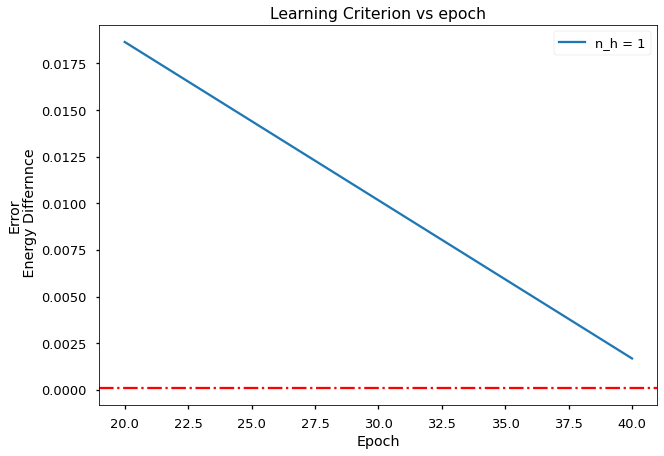

In [17]:
print(f'The min n_h is {nh_min}.\n')

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, xlabel = 'Epoch', ylabel = 'Error\n Energy Differnnce', title = 'Learning Criterion vs epoch')
for i in range(0, len(nh_list), 4):
    ax.plot(*np.array(e_list)[i].T, label =f'n_h = {nh_list[i]}' )
ax.axhline(y=0.0001, color='r', linestyle='-.')

# plt.yscale('log')
plt.legend(loc=0, ncol=2)
plt.show()      

In [16]:
'''
This gives the list of the samples we will be trying. 
'''
n_sample_list = np.arange(500, n_total_samples, 100)

